# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
%matplotlib inline

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_combined_data = pd.merge(mouse_metadata, study_results, on ='Mouse ID')

# Display the data table for preview
mouse_combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mouse_count = mouse_combined_data["Mouse ID"].nunique()
mouse_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_combined_data[mouse_combined_data.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False )]
duplicate_mice["Mouse ID"].unique()

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_combined_data = mouse_combined_data[(mouse_combined_data['Mouse ID'] != duplicate_mice["Mouse ID"].unique()[0])]

In [8]:
# Checking the number of mice in the clean DataFrame.
len(mouse_combined_data["Mouse ID"].unique())

248

In [19]:
mouse_combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
grouped_data = mouse_combined_data.groupby("Drug Regimen")
tumor_stats = grouped_data["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tumor_stats.columns = ["Mean", "Median", "Variance", "Std. Deviation", "SEM"]
tumor_stats.head()

,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

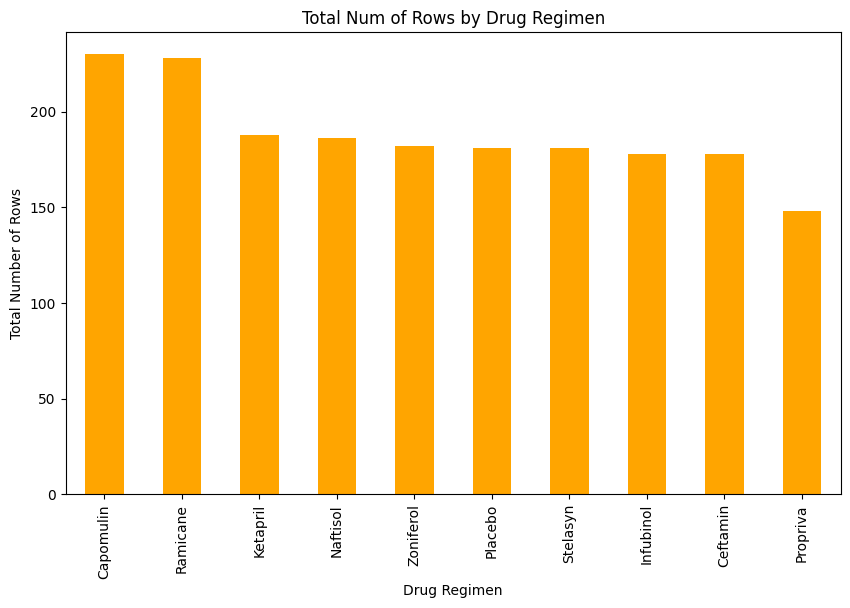

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regiemen_counts = mouse_combined_data["Drug Regimen"].value_counts()
drug_regiemen_counts.plot(kind = "bar", color = "orange", figsize = (10, 6), title = "Total Num Rows")

# plot axies for chart
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows")
plt.title("Total Num of Rows by Drug Regimen")

# printing chart
plt.show()


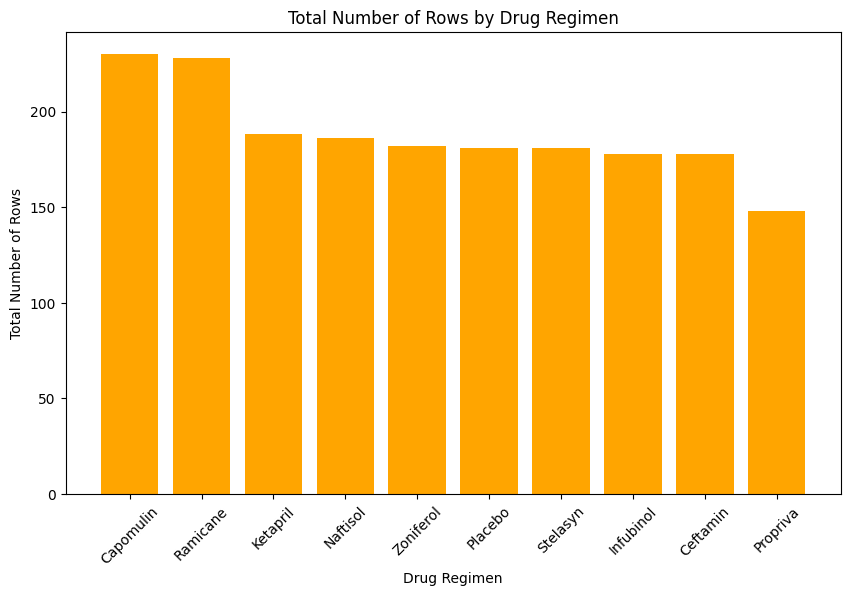

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Using the drug_regimen_counts variable 
drug_regiemen_counts = mouse_combined_data["Drug Regimen"].value_counts()
plt.figure(figsize = (10, 6))
plt.bar(drug_regiemen_counts.index, drug_regiemen_counts.values, color = "orange", )
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows")
plt.title("Total Number of Rows by Drug Regimen")

# rotate x axis for easier reading 
plt.xticks(rotation = 45)
plt.show()


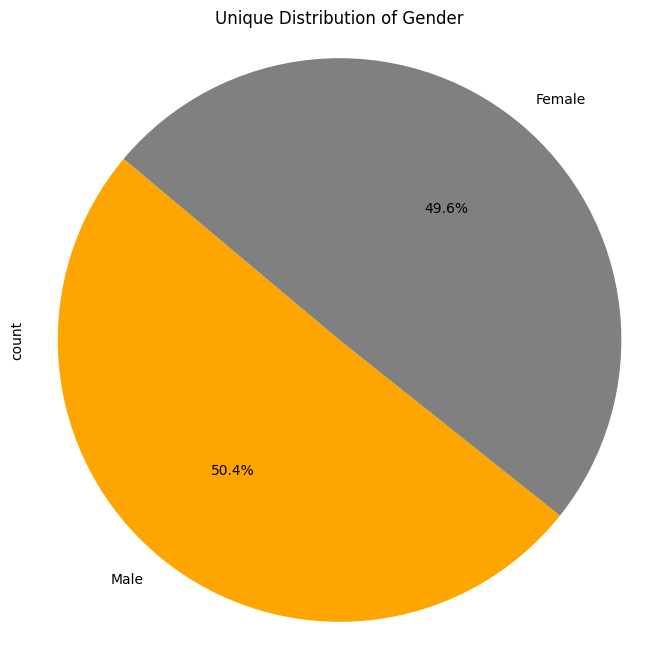

In [13]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender

# getting the unique vslue counts for the unique gender 
unique_mice = mouse_combined_data.drop_duplicates(subset="Mouse ID")[["Mouse ID", "Sex"]]
gender_distribution = unique_mice["Sex"].value_counts()

# Make the pie chart
gender_distribution.plot(
                        kind = "pie", autopct = "%1.1F%%", colors = ["Orange", "Grey"], 
                         startangle = 140, figsize = (8, 8), title = "Unique Distribution of Gender"
                         )

#set equal aspect ratio to make it easier to read
plt.axis("equal")
plt.show()


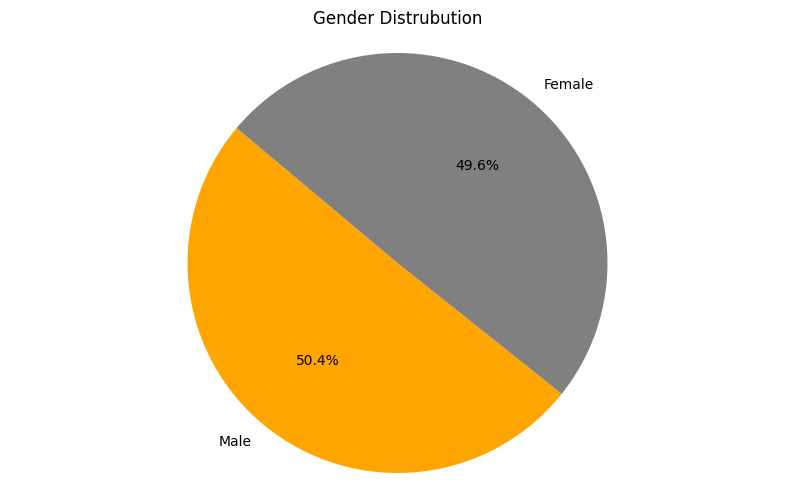

In [14]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender

# Make the pie chart
plt.figure(figsize = (10, 6))
plt.pie(
        gender_distribution, labels = gender_distribution.index, autopct = "%1.1f%%", 
        startangle = 140, colors = ["Orange", "Grey"]
        )
plt.title("Gender Distrubution")

# set equal aspect ratio for easier reading
plt.axis("equal")
plt.show()

In [15]:
mouse_combined_data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# creating a variable to hold the four treatment regimens 
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# group by mouse_id to find the maximum timepoint for each mouse
max_timepoint = mouse_combined_data.groupby("Mouse ID")["Timepoint"].max().reset_index() 

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoint, mouse_combined_data, on = ["Mouse ID", "Timepoint"])

# create variable to get final tumor volume
final_tumor_volume = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(treatments)]
final_tumor_volume.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
10,a520,45,Ramicane,Male,13,21,38.810366,1
11,a577,30,Infubinol,Female,6,25,57.031862,2
12,a644,45,Ramicane,Female,7,17,32.978522,1
13,a685,45,Infubinol,Male,8,30,66.083066,3
19,b128,45,Capomulin,Female,9,22,38.982878,2


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments: 
    final_tumor_vols = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

# add subset
tumor_vol_data.append(final_tumor_vols)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = final_tumor_vols.quantile([0.25, 0.5, 0.75])
# setting variables for the IQR
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
inner_q = upper_q - lower_q
lower_bound = lower_q - (1.5 * inner_q)
upper_bound = upper_q + (1.5 * inner_q)
# Determine outliers using upper and lower bounds
outliers = final_tumor_vols.loc[(final_tumor_vols < lower_bound) | (final_tumor_vols > upper_bound)]
# print outliers for treatments
print(f"Potential outliers for {treatment}: {outliers}.")

Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64).


In [32]:
final_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [34]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Create a list of tumor volume data for each treatment group

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(final_tumor_volume, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], flierprops=dict(marker='o', color='red', markersize=8))
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(axis='y')
plt.show()

C:\Users\Carl\AppData\Local\Temp\ipykernel_23192\1207062071.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(final_tumor_volume, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], flierprops=dict(marker='o', color='red', markersize=8))


ValueError: Dimensions of labels and X must be compatible

In [ ]:
mouse_combined_data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

## Line and Scatter Plots

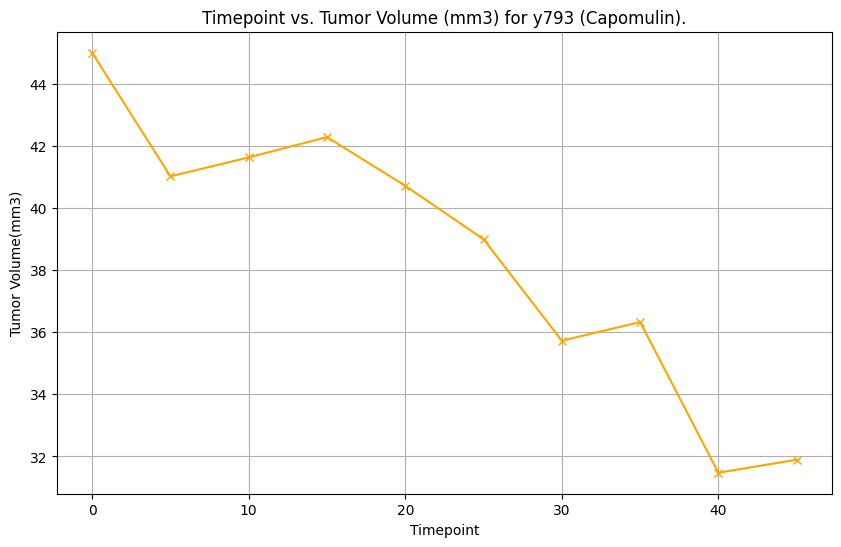

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# setting my variable to test for Capomulin
mouse_id_test = "y793"

# filtering the specific data for a444 and Capomulin
capomulin_data = mouse_combined_data[(mouse_combined_data["Drug Regimen"] == "Capomulin") & (mouse_combined_data["Mouse ID"] == mouse_id_test)]

# extracting the time points and tumor volume for the mouse_id and drug regimen
timepoint_a444 = capomulin_data["Timepoint"]
tumor_vol_a444 = capomulin_data["Tumor Volume (mm3)"]

# generating the line plot 
plt.figure(figsize = (10, 6))
plt.plot(timepoint_a444, tumor_vol_a444, marker = "x", color = "orange", label = f"Mouse ID {mouse_id_test}.")
plt.title(f"Timepoint vs. Tumor Volume (mm3) for {mouse_id_test} (Capomulin).")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume(mm3)")
plt.grid(True)
plt.show()

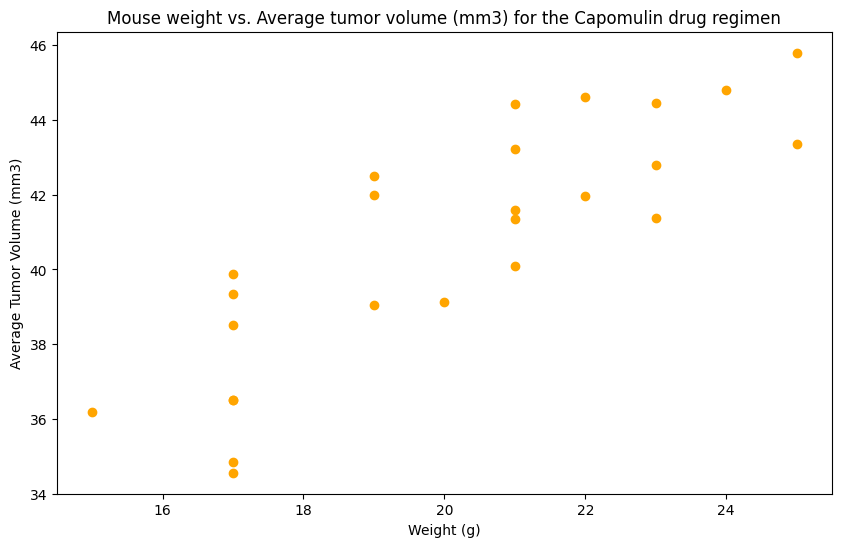

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# filtering the data for the "Capomulin" regimen
capomulin_data = mouse_combined_data[(mouse_combined_data["Drug Regimen"] == "Capomulin")]

# calculating the average tumor volume for all mice in the Capomulin drug regimen
avg_tumor_vol = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# calculating the average weight for all mice in the Capomulin drug regimen
avg_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# plotting the data in a scatter plot
plt.figure(figsize = (10, 6))
plt.scatter(avg_weight, avg_tumor_vol, marker = "o", color = "orange")

# creating labels for axies and title for graph
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse weight vs. Average tumor volume (mm3) for the Capomulin drug regimen")

#showing graph
plt.show()

In [ ]:
mouse_combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Correlation and Regression

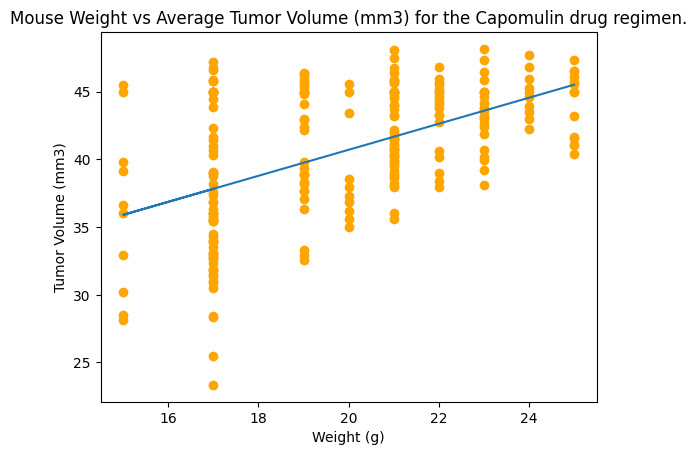

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# filtering the data for the "Capomulin" regimen
capomulin_data = mouse_combined_data[(mouse_combined_data["Drug Regimen"] == "Capomulin")]

# calculating the coorlation betweein mouse weight and tumor volume
weight = mouse_combined_data.iloc[:,4]
volume = mouse_combined_data.iloc[:,6]
coorlation = st.pearsonr(weight, volume)

# perfrom the leniar regression
(slope, intercept, r_value, p_value, std_err) = st.linregress(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])

# creating the linear regression modle
x_values = capomulin_data["Weight (g)"]
y_values = slope * x_values + intercept

# plotting the data in the linear regression modle
plt.scatter(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"], marker = "o", color = "orange")
plt.plot(x_values, y_values, label = "Linear Regression Modle")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume (mm3) for the Capomulin drug regimen.")
plt.show()